In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


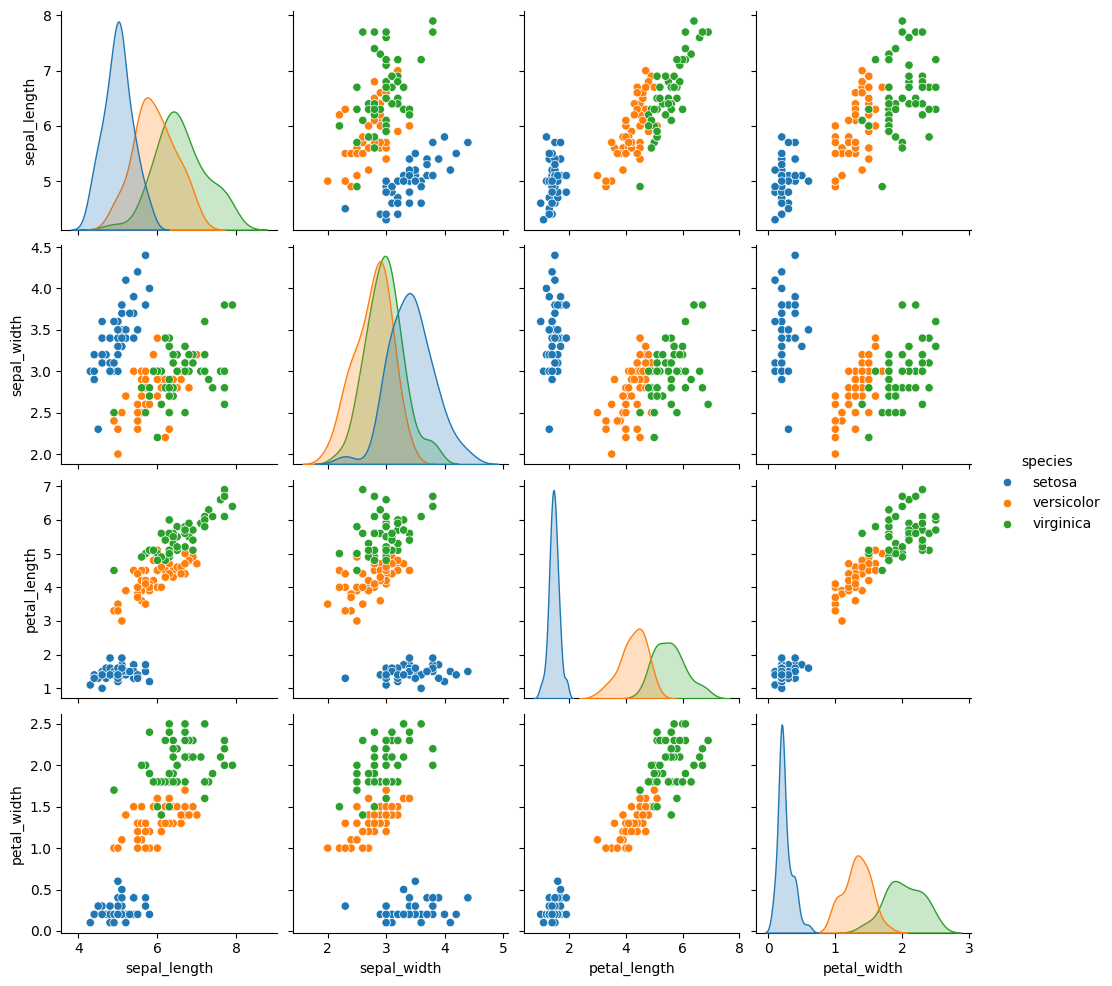

In [7]:
sns.pairplot(iris, hue='species') #setosa appears to be the most separable species

In [9]:
setosa_df = iris[iris['species'] == 'setosa']
setosa_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

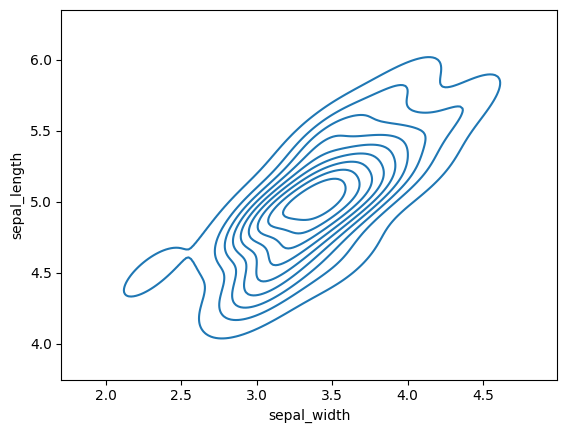

In [17]:
sns.kdeplot(x=setosa_df['sepal_width'], y=setosa_df['sepal_length'])

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

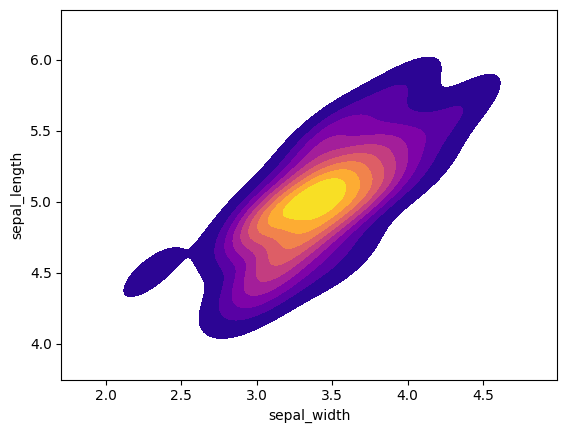

In [18]:
sns.kdeplot(x=setosa_df['sepal_width'], y=setosa_df['sepal_length'], cmap='plasma', fill=True, thresh=0.05)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = iris.drop('species', axis=1)
y = iris['species']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.svm import SVC

In [29]:
model = SVC()

In [30]:
model.fit(X_train, y_train)

SVC()

In [31]:
predictions = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [33]:
from sklearn.model_selection import GridSearchCV

In [42]:
paramater_grid = {'C': [0.1, 1, 10, 50, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.05, 0.001, 0.0001]}

In [43]:
grid = GridSearchCV(SVC(), paramater_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.714 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.05, 0.001, 0.0001]},
             verbose=4)

In [44]:
grid.best_estimator_

SVC(C=10, gamma=0.05)

In [45]:
grid.best_params_

{'C': 10, 'gamma': 0.05}

In [46]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions)) # results are perfect, overfitting is likely? Crossvalidation is needed!

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

